In [9]:
import pandas as pd
import matplotlib.pyplot as plt


In [10]:

# Load the CSV file
file_path = 'Resources/daily_returns_master.csv'  
# Update this path
data = pd.read_csv (file_path)


In [11]:

# Convert 'date' to datetime format
data['date'] = pd.to_datetime(data['date'])

# Sort data by date
data = data.sort_values(by='date')


In [12]:

# Forward-fill missing daily_return values
data['daily_return'] = data['daily_return'].dropna()



In [13]:
#Get all stock symbols in dataset
print(data['symbol'].unique())
# Remove INDU as we decided not to use that ETF for comparison. DOW instead
symbols = ['META', 'PANW', 'AMZN', 'NVDA', 'ANET', 'TSLA', 'AMD', 'DOW', 'SPY', 'NOW', 'AI', 'PATH']

# split the data up by dataframe
data_split = []
for symbol in symbols:
    temp_df = data[data['symbol'].eq(symbol)].copy()
    data = data.sort_values(by='date')
    data_split.append((symbol, temp_df))

['META' 'PANW' 'AMZN' 'NVDA' 'ANET' 'TSLA' 'INDU' 'AMD' 'DOW' 'SPY' 'NOW'
 'AI' 'PATH']


In [14]:
for _, df in data_split:
    # Calculate cumulative returns
    df['cumulative_return'] = (1 + df['daily_return']).cumprod() - 1


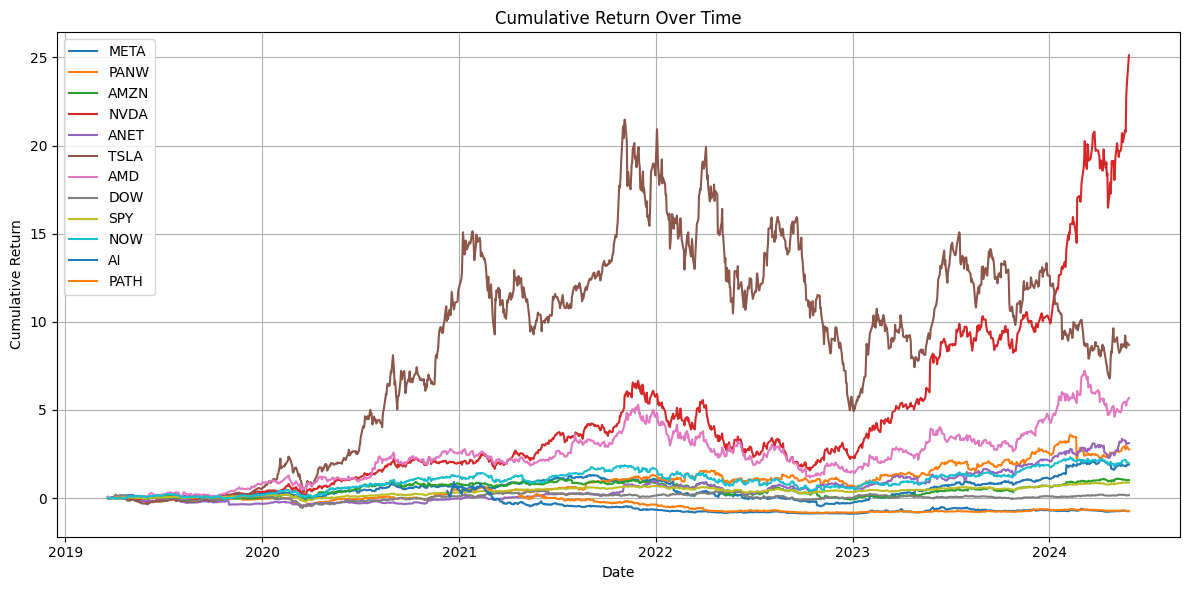

In [15]:

# Plot the cumulative returns
plt.figure(figsize=(12, 6))
for symbol, data in data_split:
    plt.plot(data['date'], data['cumulative_return'], label=symbol)
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

#save fig before show or else it saves an empty canvas
plt.savefig('Plots/cumulative_returns_all.png')
# Show the plot
plt.show()

# Save the figure
plt.close()
